# COMP9517

# Usama Sadiq

# z5235652

# Lab 3

***

In [1]:
import tensorflow as tf
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#checking the tensorflow version
print(tf.__version__)

2.3.0


In [3]:
#checking the scikit learn version
print(sk.__version__)

0.24.1


***
# Loading DataSet

## Fashion DataSet --> Tensorflow

In [4]:
#dataset = fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

***
## Classes Names in DataSet

In [5]:
#Class Names

classes_Names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal'
                , 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

***
# Split Training and Test Data

In [6]:
#shapes

#2000 training set and 500 test set
train_X = train_X[:2000,:,:]
train_Y = train_Y[:2000]

print(train_X.shape)

print(len(train_Y))

(2000, 28, 28)
2000


In [7]:
#trainY
print(train_Y)

[9 0 0 ... 3 5 8]


In [8]:
test_X = test_X[:500,:,:]
test_Y = test_Y[:500]

print(test_X.shape)
print(len(test_Y))

(500, 28, 28)
500


***
# Print images from DataSet

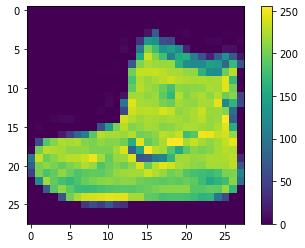

In [9]:
plt.figure()
plt.imshow(train_X[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_X = train_X / 255.0

test_X = test_X / 255.0

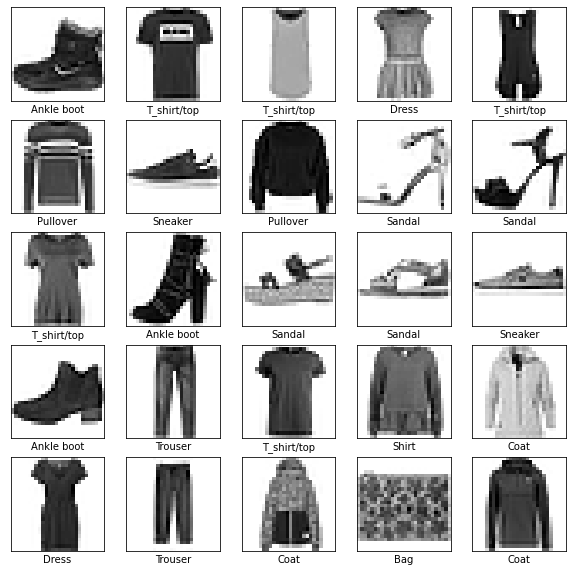

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(classes_Names[train_Y[i]])
plt.show()

In [12]:
#change the shape from 3d to 2d
train_X = np.reshape(train_X,(2000,-1))
print(train_X.shape)

(2000, 784)


***
# KNN Classifier

## - Training the model

## - Prediction

## - Classification Report

In [13]:
#KNN

model = KNeighborsClassifier(n_neighbors=2)

model = model.fit(train_X, train_Y)

pred = model.predict(train_X)

print(metrics.accuracy_score(train_Y,pred))



0.905


In [14]:
test_X = np.reshape(test_X,(500,-1))

pred_test = model.predict(test_X)

print(metrics.accuracy_score(test_Y,pred_test))

0.794


In [15]:
print(metrics.classification_report(test_Y,pred_test,target_names=classes_Names))

              precision    recall  f1-score   support

 T_shirt/top       0.78      0.84      0.81        55
     Trouser       0.89      0.98      0.94        52
    Pullover       0.62      0.77      0.69        65
       Dress       0.71      0.78      0.74        46
        Coat       0.75      0.63      0.69        57
      Sandal       0.94      0.87      0.91        39
       Shirt       0.61      0.40      0.49        47
     Sneaker       0.81      0.94      0.87        47
         Bag       1.00      0.91      0.95        44
  Ankle boot       0.93      0.85      0.89        48

    accuracy                           0.79       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.80      0.79      0.79       500



In [16]:
#print(metrics.plot_confusion_matrix(model,test_X,test_Y,display_labels=classes_Names,xticks_rotation = 'vertical'))

In [17]:
print("KNN Classifier Confusion Matrix :")
print(metrics.confusion_matrix(test_Y,pred_test))

KNN Classifier Confusion Matrix :
[[46  2  4  2  0  0  1  0  0  0]
 [ 0 51  0  1  0  0  0  0  0  0]
 [ 3  0 50  1  6  0  5  0  0  0]
 [ 3  3  1 36  2  0  1  0  0  0]
 [ 0  1  9  6 36  0  5  0  0  0]
 [ 0  0  0  0  0 34  0  3  0  2]
 [ 6  0 14  4  4  0 19  0  0  0]
 [ 0  0  0  0  0  2  0 44  0  1]
 [ 1  0  2  1  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  7  0 41]]


***
# SGD Classifier

## - Training the model

## - Prediction

## - Classification Report

In [18]:
model_sgd = SGDClassifier(max_iter=250)

model_sgd = model_sgd.fit(train_X,train_Y)

pred = model_sgd.predict(train_X)

print(metrics.accuracy_score(train_Y,pred))

0.9425


In [19]:
pred_test = model_sgd.predict(test_X)

print(metrics.accuracy_score(test_Y,pred_test))

0.806


In [20]:
print(metrics.classification_report(test_Y,pred_test,target_names=classes_Names))

              precision    recall  f1-score   support

 T_shirt/top       0.92      0.80      0.85        55
     Trouser       0.96      0.98      0.97        52
    Pullover       0.72      0.68      0.70        65
       Dress       0.92      0.78      0.85        46
        Coat       0.92      0.58      0.71        57
      Sandal       0.82      0.92      0.87        39
       Shirt       0.43      0.79      0.55        47
     Sneaker       0.83      0.94      0.88        47
         Bag       1.00      0.89      0.94        44
  Ankle boot       0.97      0.81      0.89        48

    accuracy                           0.81       500
   macro avg       0.85      0.82      0.82       500
weighted avg       0.85      0.81      0.81       500



In [21]:
#print(metrics.plot_confusion_matrix(model_sgd,test_X,test_Y,display_labels=classes_Names,xticks_rotation = 'vertical'))

print("SGD Classifier Confusion Matrix :")
print(metrics.confusion_matrix(test_Y,pred_test))

SGD Classifier Confusion Matrix :
[[44  0  0  1  0  0 10  0  0  0]
 [ 0 51  0  1  0  0  0  0  0  0]
 [ 0  0 44  0  3  0 18  0  0  0]
 [ 1  2  0 36  0  0  7  0  0  0]
 [ 0  0 11  0 33  0 12  1  0  0]
 [ 0  0  0  0  0 36  0  2  0  1]
 [ 3  0  6  1  0  0 37  0  0  0]
 [ 0  0  0  0  0  3  0 44  0  0]
 [ 0  0  0  0  0  2  3  0 39  0]
 [ 0  0  0  0  0  3  0  6  0 39]]


# Decision Tree Classfier

## - Training the model

## - Prediction

## - Classification Report

In [22]:
model_decision_tree = DecisionTreeClassifier(random_state=0)

model_decision_tree = model_decision_tree.fit(train_X,train_Y)

pred = model_decision_tree.predict(train_X)

print(metrics.accuracy_score(train_Y,pred))

1.0


In [23]:
pred_test = model_decision_tree.predict(test_X)

print(metrics.accuracy_score(test_Y,pred_test))

0.712


In [24]:
print(metrics.classification_report(test_Y,pred_test,target_names=classes_Names))

              precision    recall  f1-score   support

 T_shirt/top       0.85      0.82      0.83        55
     Trouser       0.88      0.88      0.88        52
    Pullover       0.57      0.51      0.54        65
       Dress       0.56      0.76      0.65        46
        Coat       0.56      0.44      0.49        57
      Sandal       0.86      0.82      0.84        39
       Shirt       0.43      0.45      0.44        47
     Sneaker       0.84      0.91      0.88        47
         Bag       0.79      0.75      0.77        44
  Ankle boot       0.84      0.90      0.87        48

    accuracy                           0.71       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.71      0.71      0.71       500



In [25]:
#print(metrics.plot_confusion_matrix(model_decision_tree,test_X,test_Y,display_labels=classes_Names,xticks_rotation = 'vertical'))

print("Decision Tree Classifier Confusion Matrix :")
print(metrics.confusion_matrix(test_Y,pred_test))

Decision Tree Classifier Confusion Matrix :
[[45  0  0  4  2  0  4  0  0  0]
 [ 1 46  0  4  0  1  0  0  0  0]
 [ 1  1 33  3 12  2  9  1  2  1]
 [ 2  2  3 35  1  0  3  0  0  0]
 [ 0  2 13  6 25  0  9  0  2  0]
 [ 1  0  0  0  0 32  0  3  2  1]
 [ 2  1  8 10  2  0 21  0  3  0]
 [ 0  0  0  0  0  1  0 43  0  3]
 [ 1  0  1  0  3  0  3  0 33  3]
 [ 0  0  0  0  0  1  0  4  0 43]]


# References

1) https://www.tensorflow.org/tutorials/keras/classification